<a href="https://colab.research.google.com/github/pjuvm/BCI-lab/blob/lab2/BCI_class_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from pylab import *
from collections import Counter

In [8]:
os.listdir()

['README.md',
 'Images',
 'plot_topo.py',
 'P300Data',
 'SsvepData',
 'AudVisData',
 'LICENSE',
 '.gitattributes',
 'Lab0_PythonTest.py',
 '__pycache__',
 'loadmat.py',
 'load_p300_data.py',
 'BCI_Lab1_EEGplots.zip',
 'test_load_p300_data.py',
 'P300_S9_training_rawdata.png',
 'P300_S8_training_rawdata.png',
 'P300_S6_training_rawdata.png',
 'P300_S7_training_rawdata.png',
 'P300_S3_training_rawdata.png',
 'P300_S5_training_rawdata.png',
 'P300_S4_training_rawdata.png',
 'P300_S10_training_rawdata.png',
 'plot_p300_erps.py',
 '.ipynb_checkpoints',
 'test_plot_p300_erps.py']

In [3]:
os.chdir("drive/MyDrive/BCIs/BCIs-S24-main")

In [9]:
from load_p300_data import *
!python test_plot_p300_erps.py

Figure(1200x800)
Figure(1200x800)
Figure(1200x800)
Figure(1200x800)
Figure(1200x800)
Figure(1200x800)
Figure(1200x800)
Figure(1200x800)
Figure(1200x800)


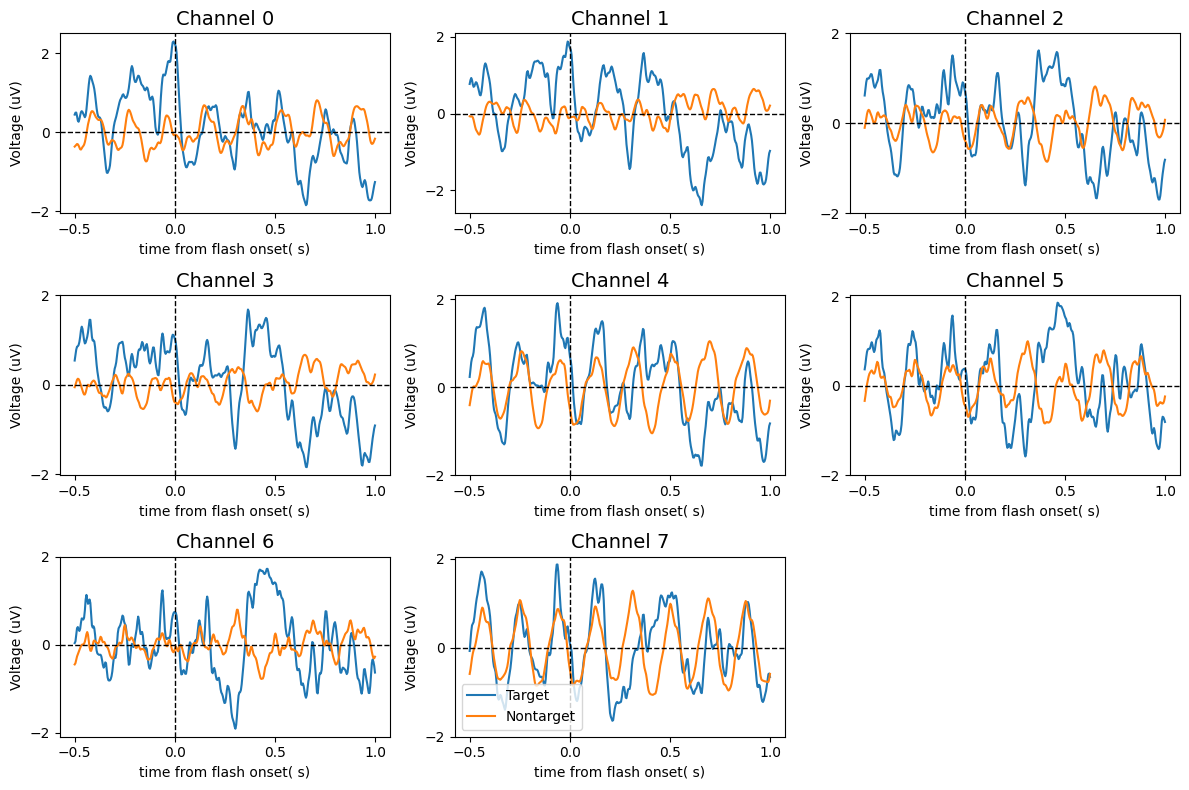

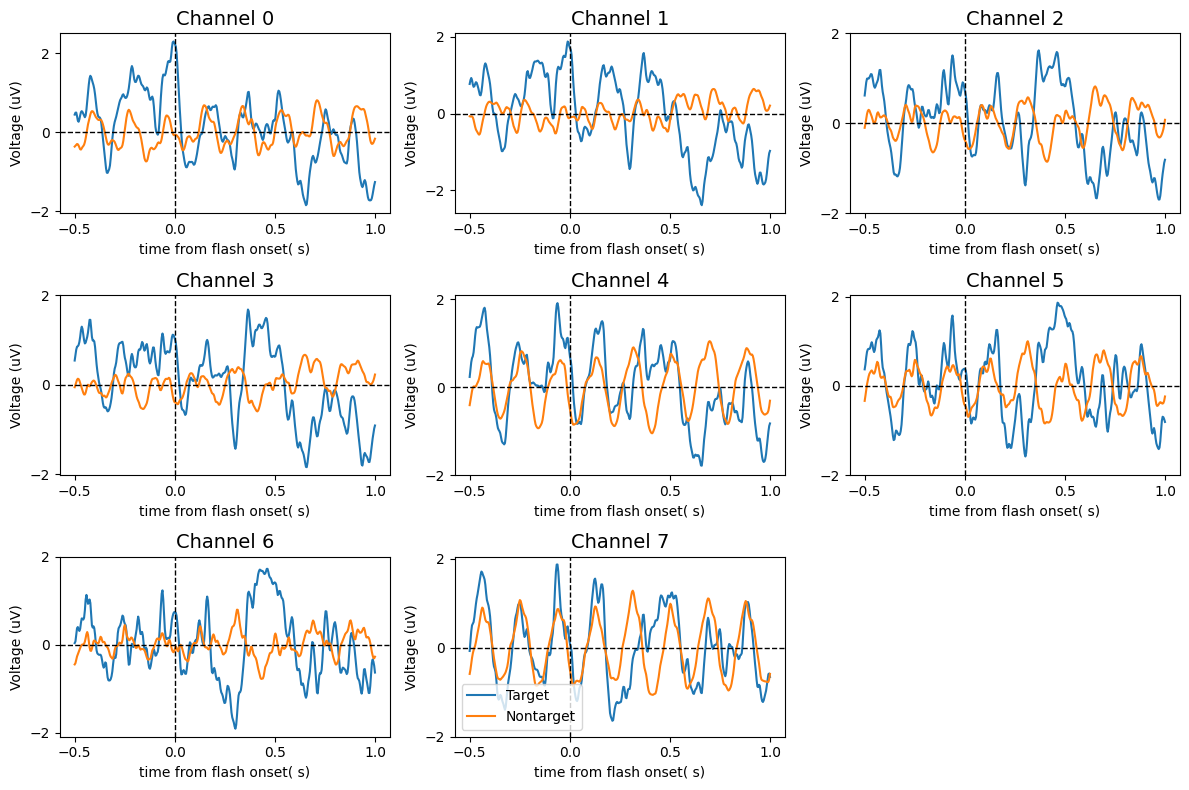

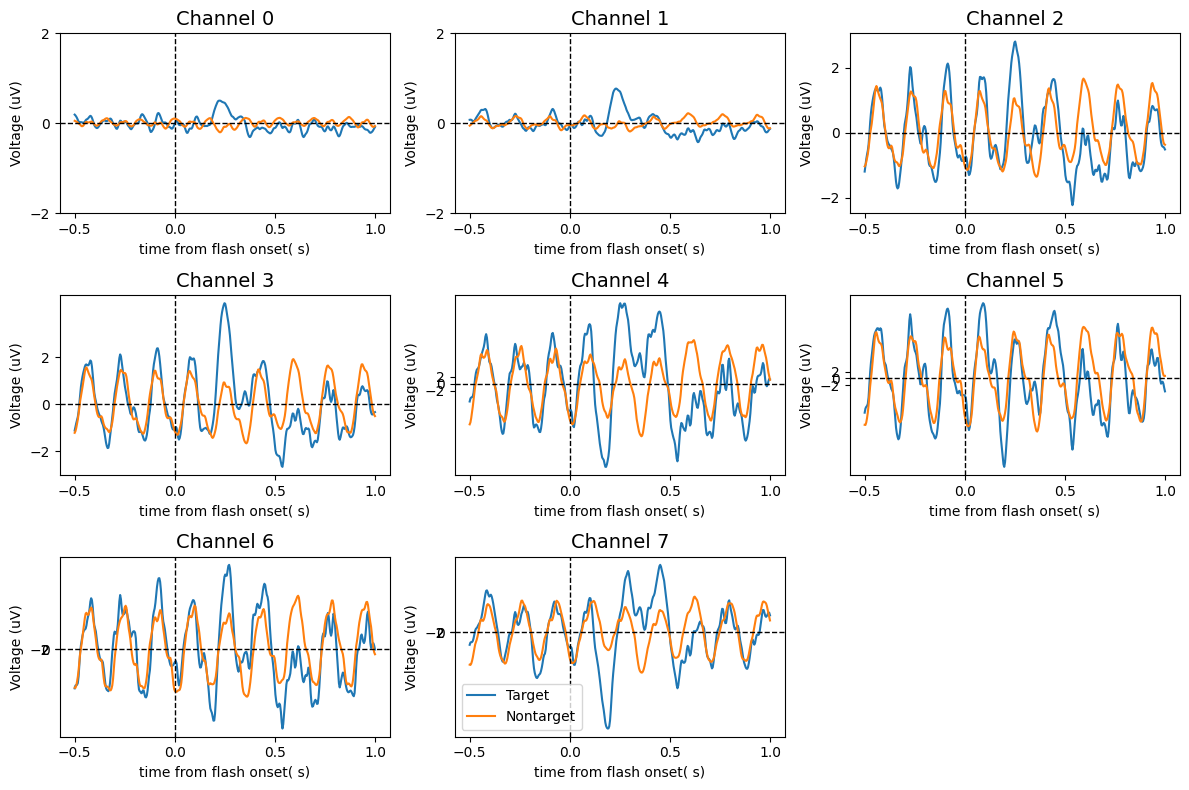

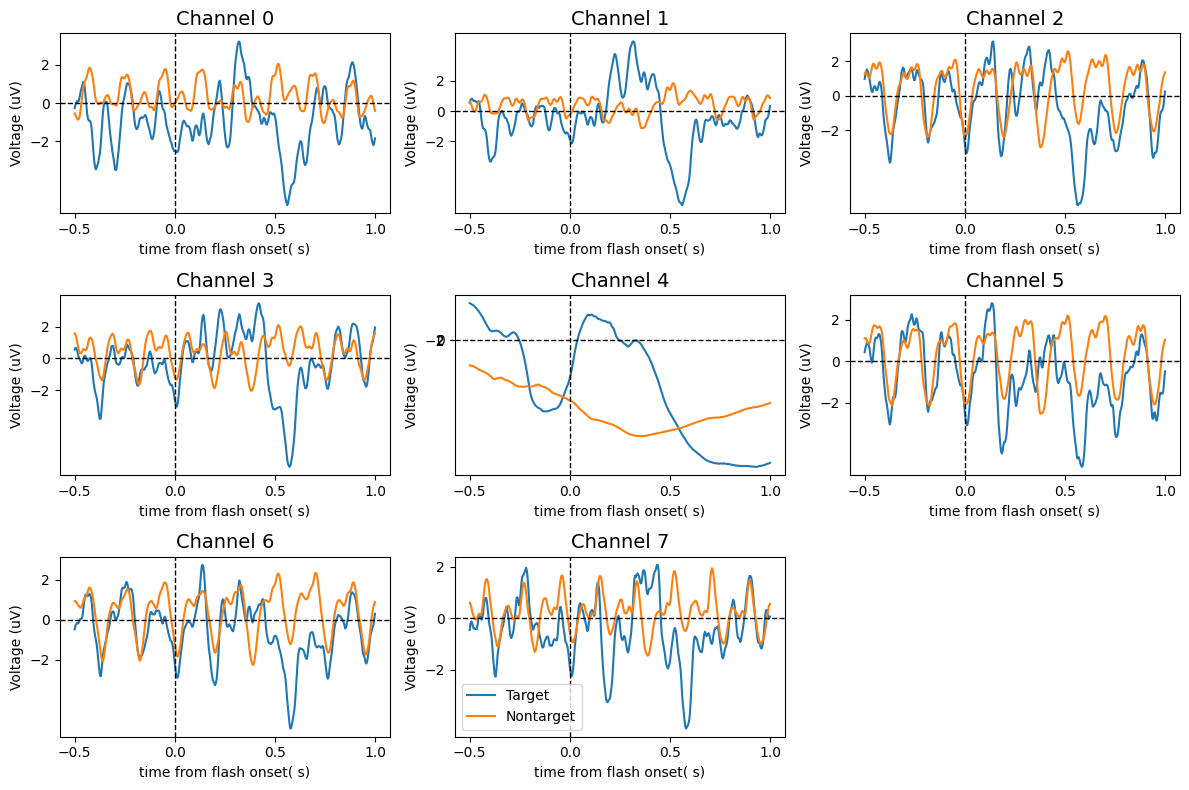

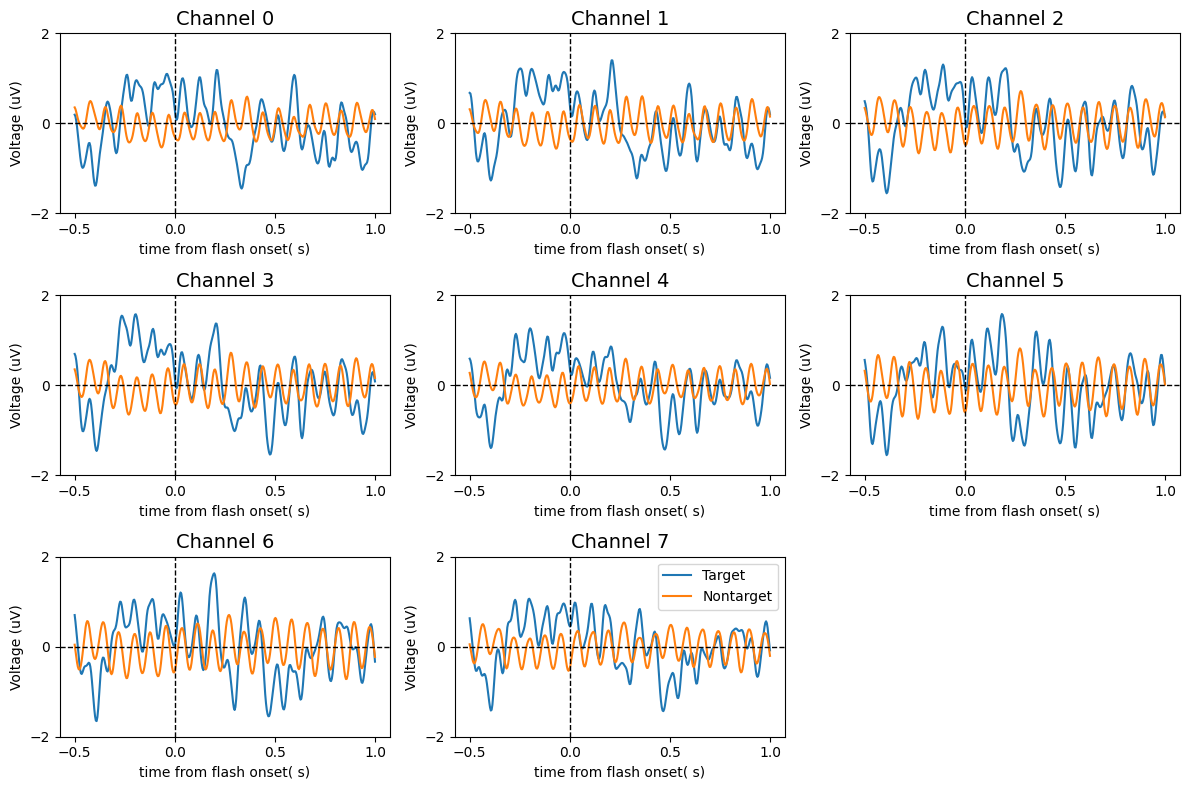

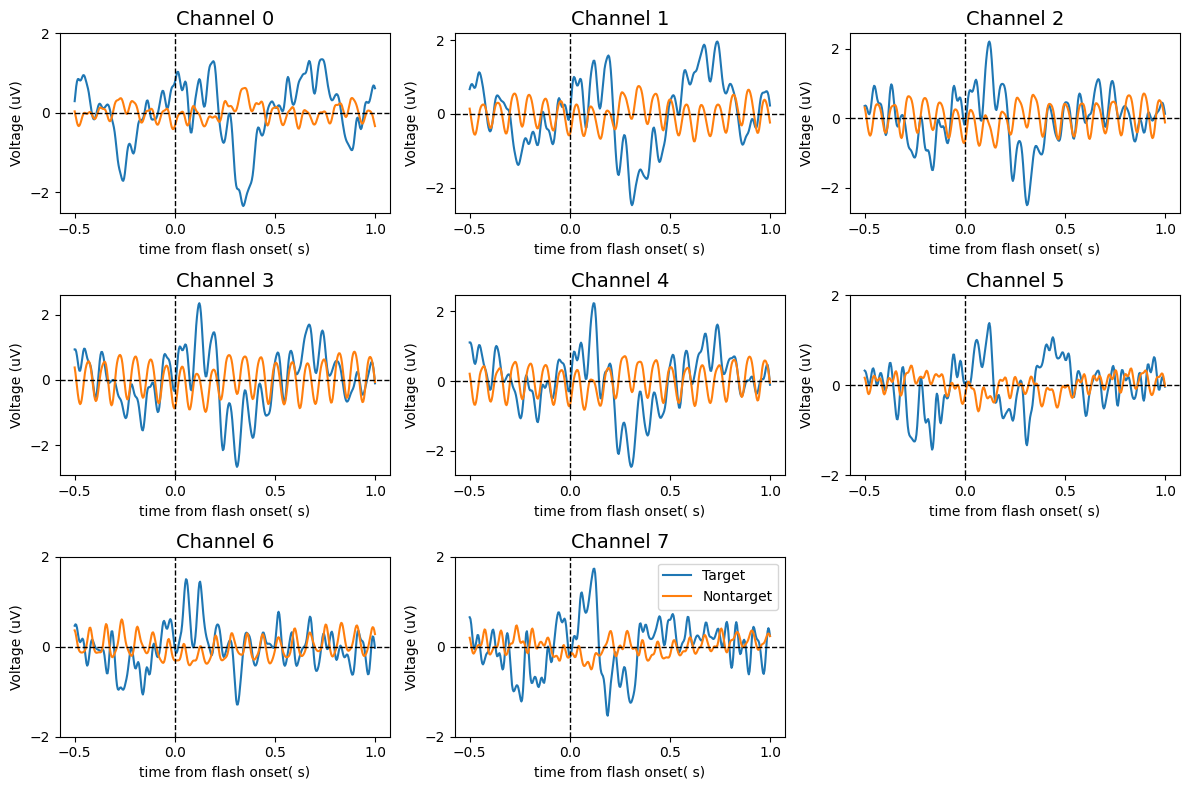

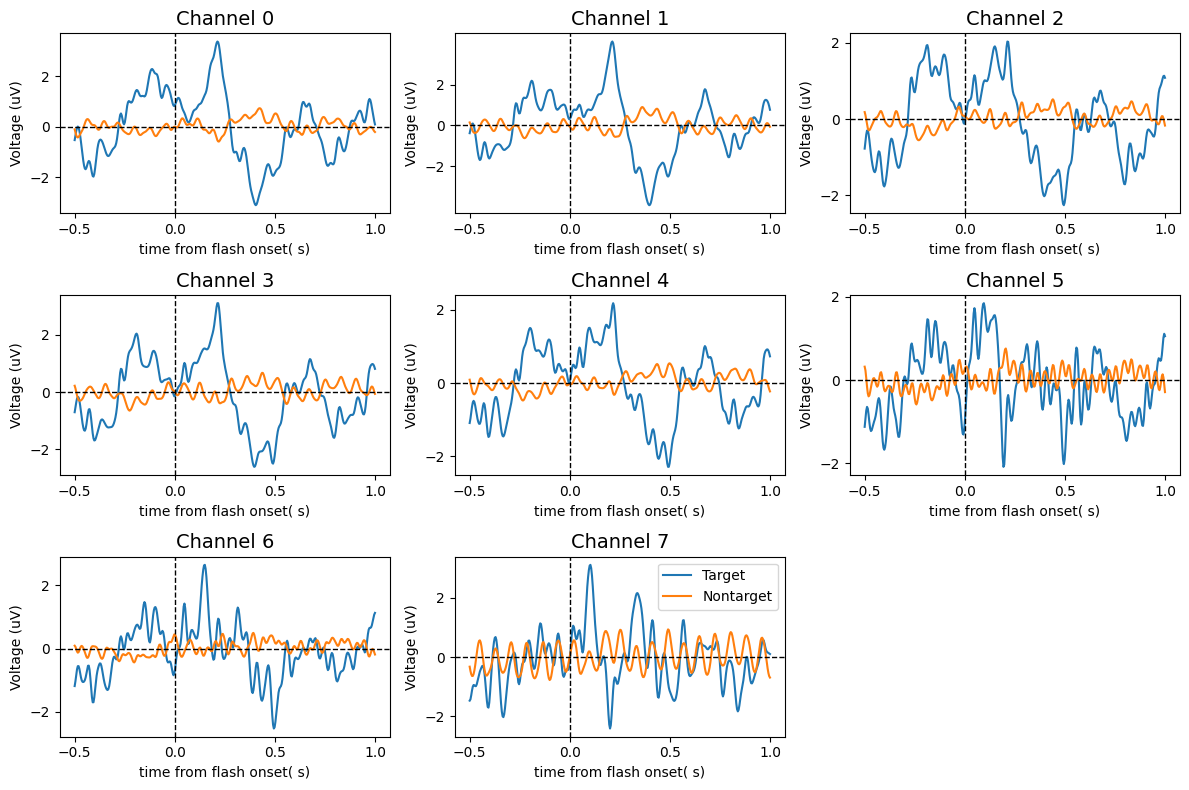

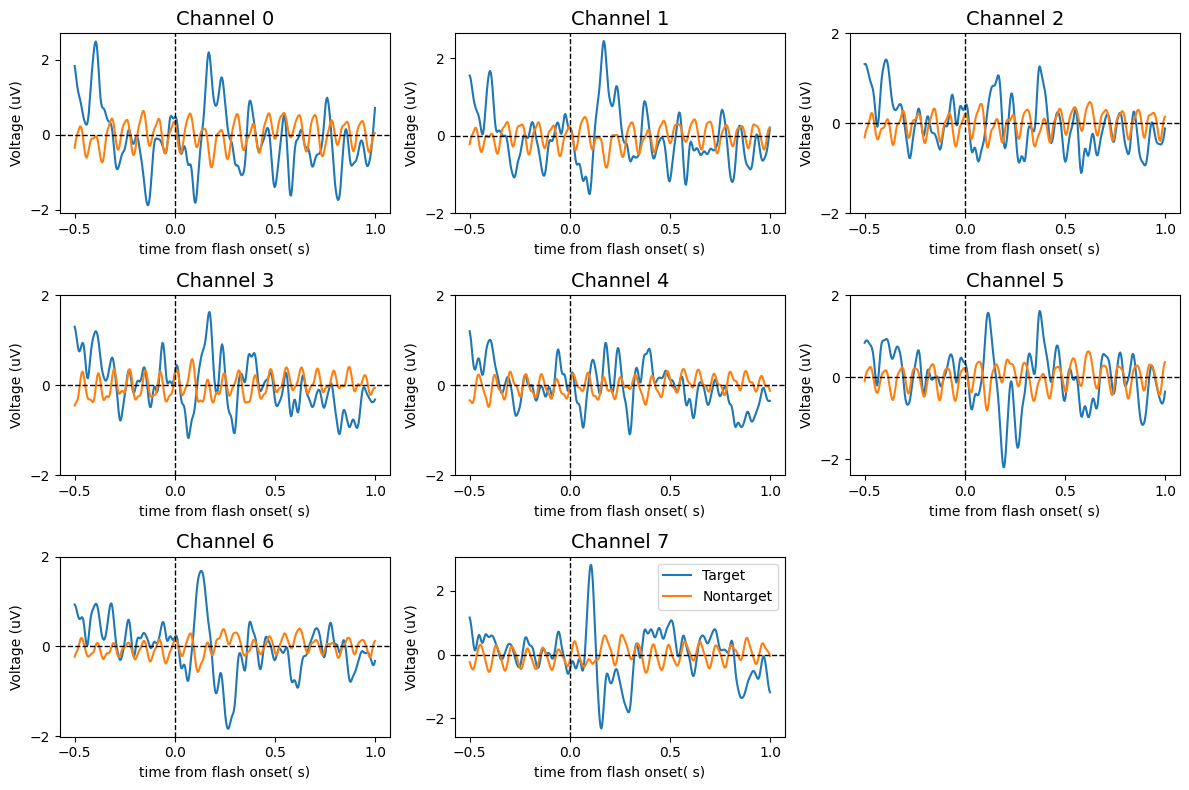

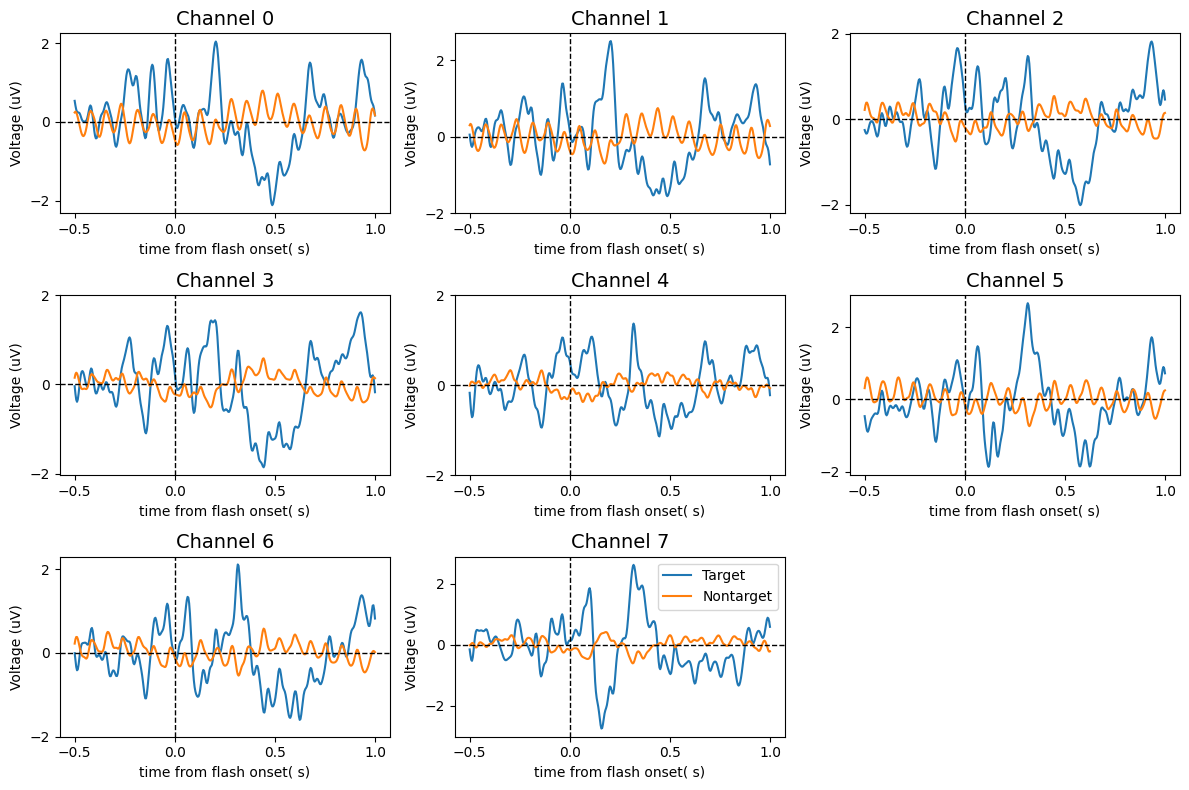

In [10]:
import load_p300_data

# define file path
data_directory = "P300Data/"

# call load and plot functions from load_p300_data module
eeg_time, eeg_data, rowcol_id, is_target = load_p300_data.load_training_eeg(data_directory = data_directory ,
                                                                            subject = 3)

#%%
import plot_p300_erps
event_sample, is_target_event = plot_p300_erps.get_events(rowcol_id, is_target)

# %%
eeg_epochs, erp_times = plot_p300_erps.epoch_data(eeg_time, eeg_data, event_sample)
# %%
target_erp, nontarget_erp= plot_p300_erps.get_erps(eeg_epochs, is_target_event)

# %%
plot_p300_erps.plot_erps(target_erp,nontarget_erp,erp_times)

# %%
for subject in range(3, 11):
    eeg_time, eeg_data, rowcol_id, is_target = load_p300_data.load_training_eeg(data_directory = data_directory ,
                                                                            subject = subject)
    event_sample, is_target_event = plot_p300_erps.get_events(rowcol_id, is_target)
    eeg_epochs, erp_times = plot_p300_erps.epoch_data(eeg_time, eeg_data, event_sample)
    target_erp, nontarget_erp= plot_p300_erps.get_erps(eeg_epochs, is_target_event)
    plot_p300_erps.plot_erps(target_erp,nontarget_erp,erp_times)
# %%

In [68]:
eeg_time, eeg_data, rowcol_id, is_target = load_training_eeg(subject = 3)

In [69]:
event_sample = np.where(np.diff(rowcol_id) > 0)
event_sample = event_sample[0]

In [70]:
event_sample = [x + 1 for x in event_sample]
print(len(event_sample))
is_target_event = []
for e in event_sample:
  if is_target[e] == True:
    is_target_event.append(True)
  else:
    is_target_event.append(False)
Counter(is_target_event)

dt = np.diff(eeg_time)[0]
fs = 1/dt

samples_per_epoch = 1.5 * fs
print(samples_per_epoch)

len(is_target_event)

900
384.0


900

In [73]:
target_epochs = []
nontarget_epochs = []
for i in range(len(event_sample)):
  t0 = event_sample[i]
  #print(t0)
  if is_target_event[i] == True:
    target_epochs.append(eeg_data[:,int(t0 - fs/2) : int(t0 + fs)])
  elif is_target_event[i] == False:
    nontarget_epochs.append(eeg_data[:,int(t0 - fs/2) : int(t0 + fs)])

print(len(target_epochs), len(nontarget_epochs))
target_epochs = np.array(target_epochs)
nontarget_epochs = np.array(nontarget_epochs)
target_epochs.shape, nontarget_epochs.shape
erp_times = np.arange(-128,256)
len(erp_times)
target_erp = np.mean(target_epochs, axis = 0)
nontarget_erp = np.mean(nontarget_epochs, axis = 0)
target_erp.shape,nontarget_erp.shape
cols = []

for i in range(8):
  cols.append(i % 3)

print(cols)

rows = []
for i in range(8):
  row = i // 3
  rows.append(row)





150 750
[0, 1, 2, 0, 1, 2, 0, 1]


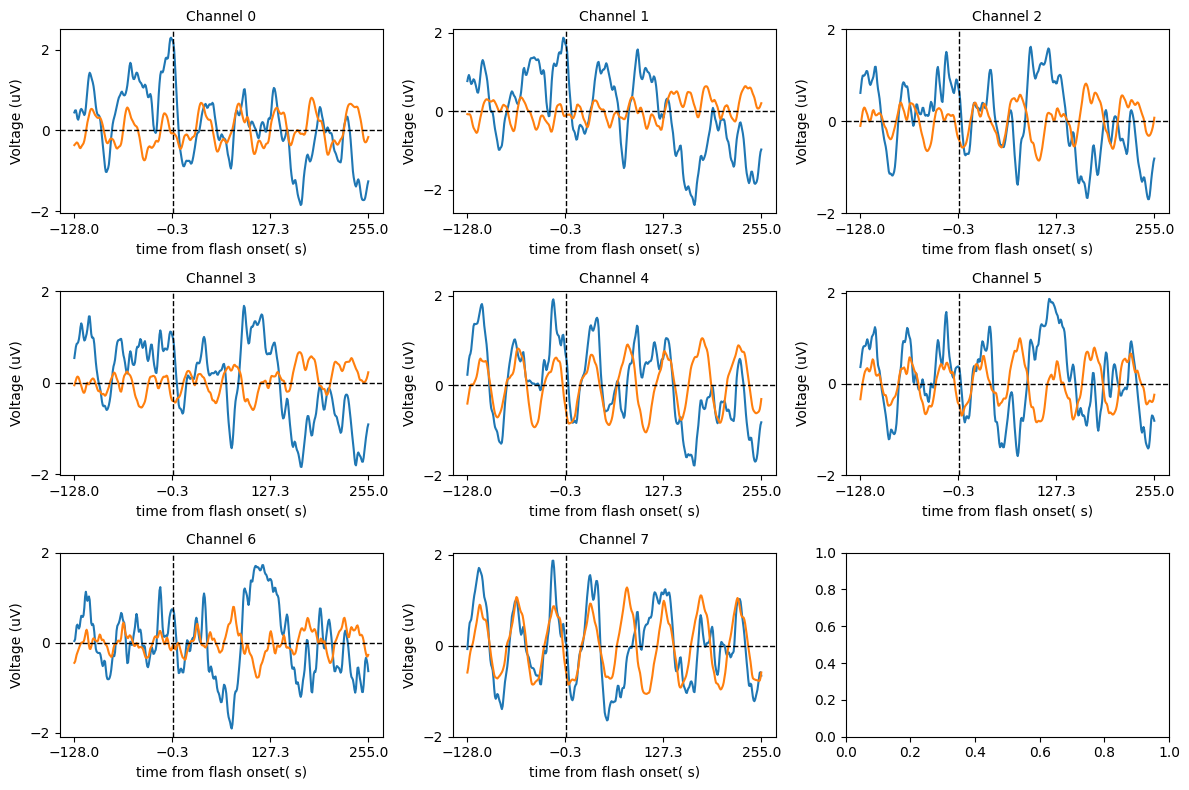

In [74]:
fig, axes = plt.subplots(3, 3, figsize = (12,8))
for idx in range(8):
  ax = axes[rows[idx], cols[idx]]
  ax.plot(erp_times, target_erp[idx,:])
  ax.plot(erp_times, nontarget_erp[idx,:])
  # Add a dotted line at x=0 and y=0
  ax.axvline(x=0, linestyle='--', color='black', linewidth=1)
  ax.axhline(y=0, linestyle='--', color='black', linewidth=1)

  # Set y-axis ticks
  ax.set_yticks([-2, 0, 2])

  # Set x-axis ticks
  ax.set_xticks(np.linspace(erp_times[0], erp_times[-1], 4))

  # Set subplot title and labels
  ax.set_title(f'Channel {idx}', fontsize=10)
  ax.set_xlabel('time from flash onset( s)')
  ax.set_ylabel('Voltage (uV)')
  #if idx == 7:
   # ax.legend()

fig.tight_layout()
plt.tight_layout()
plt.show()